In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("/Users/shreyaspeherkar/Desktop/Dataset/iris.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
X=df.iloc[:,0:4]
y=df.iloc[:,-1]
y  

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=1)
X_test

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0
56,6.3,3.3,4.7,1.6
141,6.9,3.1,5.1,2.3
44,5.1,3.8,1.9,0.4
29,4.7,3.2,1.6,0.2
120,6.9,3.2,5.7,2.3


In [7]:
from sklearn.preprocessing import LabelEncoder 
la_object = LabelEncoder()
y = la_object.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_predicted = model.predict(X_test)
y_predicted

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype='<U10')

In [10]:
model.score(X_test,y_test)

0.9666666666666667

In [11]:
from sklearn.metrics import confusion_matrix,classification_report 
cm = confusion_matrix(y_test, y_predicted)

In [12]:
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [14]:
# classification report for precision, recall f1-score and accuracy
cl_report=classification_report(y_test,y_predicted)
cl_report

'              precision    recall  f1-score   support\n\n      setosa       1.00      1.00      1.00        11\n  versicolor       1.00      0.92      0.96        13\n   virginica       0.86      1.00      0.92         6\n\n    accuracy                           0.97        30\n   macro avg       0.95      0.97      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [15]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for pl otting.
cm_df = pd.DataFrame(cm,
                     index = ['SETOSA','VERSICOLR','VIRGINICA'],
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])

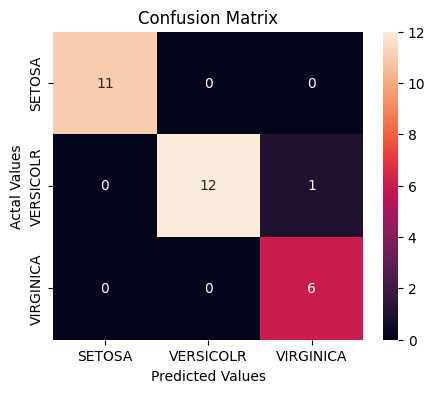

In [18]:
#Plotting the confusion matrix
import seaborn as sns 
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True) 
plt.title('Confusion Matrix') 
plt.ylabel('Actal Values') 
plt.xlabel('Predicted Values')
plt.show()

In [20]:
def accuracy_cm(tp,fn,fp,tn): 
    return (tp+tn)/(tp+fp+tn+fn)

def precision_cm(tp,fn,fp,tn): 
    return tp/(tp+fp)

def recall_cm(tp,fn,fp,tn): 
    return tp/(tp+fn)

def f1_score(tp,fn,fp,tn):
    return (2/((1/recall_cm(tp,fn,fp,tn))+precision_cm(tp,fn,fp,tn)))

def error_rate_cm(tp,fn,fp,tn): 
    return 1-accuracy_cm(tp,fn,fp,tn)

In [22]:
#For Virginica
tp = cm[2][2]
fn = cm[2][0]+cm[2][1]
fp = cm[0][2]+cm[1][2]
tn = cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]
print("For Virginica \n")
print("Accuracy: ",accuracy_cm(tp,fn,fp,tn))
print("Precision: ",precision_cm(tp,fn,fp,tn))
print("Recall: ",recall_cm(tp,fn,fp,tn))
print("F1-Score: ",f1_score(tp,fn,fp,tn))
print("Error rate : ",error_rate_cm(tp,fn,fp,tn))

For Virginica 

Accuracy:  0.9666666666666667
Precision:  0.8571428571428571
Recall:  1.0
F1-Score:  1.0769230769230769
Error rate :  0.033333333333333326
